In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

In [2]:
train_df= pd.read_excel("Data_Train.xlsx")
pd.set_option('display.max_columns',None)

In [3]:
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
train_df.shape

(10683, 11)

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
##Checking for max and min value counts of Duration
train_df['Duration'].value_counts()

2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
29h 10m      1
47h 40m      1
3h 25m       1
29h 30m      1
35h 35m      1
Name: Duration, Length: 368, dtype: int64

In [7]:
#Null values
train_df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [8]:
#deopping nan
train_df.dropna(inplace=True)

## EDA

In [9]:
train_df.Date_of_Journey.value_counts()

18/05/2019    504
6/06/2019     503
21/05/2019    497
9/06/2019     495
12/06/2019    493
9/05/2019     484
21/03/2019    423
15/05/2019    405
27/05/2019    382
27/06/2019    355
24/06/2019    351
1/06/2019     342
3/06/2019     333
15/06/2019    328
24/03/2019    323
6/03/2019     308
27/03/2019    299
24/05/2019    286
6/05/2019     281
1/05/2019     277
12/05/2019    259
1/04/2019     257
3/03/2019     218
9/03/2019     200
15/03/2019    162
18/03/2019    156
01/03/2019    152
12/03/2019    142
9/04/2019     125
3/04/2019     110
21/06/2019    109
18/06/2019    105
09/03/2019    102
6/04/2019     100
03/03/2019     97
06/03/2019     95
27/04/2019     94
24/04/2019     92
3/05/2019      90
15/04/2019     89
21/04/2019     82
18/04/2019     67
12/04/2019     63
1/03/2019      47
Name: Date_of_Journey, dtype: int64

In [10]:
##Column has string value so it won't understand therefore it is converted
##We are not taking year data because data is only for 1 year i.e 2019
train_df['Jorney_Day']=pd.to_datetime(train_df.Date_of_Journey, format='%d/%m/%Y').dt.day

In [11]:
train_df['Journey_month']=pd.to_datetime(train_df['Date_of_Journey'], format='%d/%m/%Y').dt.month

In [12]:
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Jorney_Day,Journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [13]:
## Now we dontrequire date of Journey as we have converted all into intergers from that column
train_df.drop(['Date_of_Journey'],axis=1,inplace=True)

In [14]:
##depature is when a plane takes off from airport
##Similar to Date_of_Jouney we can extracting all the info from Dep_Time
##if Date_of_Journey had Time component ,we would extracted from that column
#Extracting hour
train_df['Dep_hour']=pd.to_datetime(train_df.Dep_Time).dt.hour

#Extracting Minutes
train_df["Dep_min"]=pd.to_datetime(train_df.Dep_Time).dt.minute

# Droping the Dep_Time column as it is of no use
train_df.drop(['Dep_Time'], axis=1, inplace=True)

In [15]:
train_df.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Jorney_Day,Journey_month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [16]:
##Arrival Time is when plane lands to the airport
##Similar to Dep_Time we can extract all info from Arrival Time
##Extracting Hour
train_df['Arr_hour']=pd.to_datetime(train_df.Arrival_Time).dt.hour

##Extracting Minutes
train_df['Arr_min']=pd.to_datetime(train_df.Arrival_Time).dt.minute

In [17]:
##Now we are drop the the Arrival Time column as it is of no use
train_df.drop(['Arrival_Time'], axis=1, inplace=True)

In [18]:
train_df.head(20)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Jorney_Day,Journey_month,Dep_hour,Dep_min,Arr_hour,Arr_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35
5,SpiceJet,Kolkata,Banglore,CCU → BLR,2h 25m,non-stop,No info,3873,24,6,9,0,11,25
6,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,15h 30m,1 stop,In-flight meal not included,11087,12,3,18,55,10,25
7,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,21h 5m,1 stop,No info,22270,1,3,8,0,5,5
8,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,25h 30m,1 stop,In-flight meal not included,11087,12,3,8,55,10,25
9,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,7h 50m,1 stop,No info,8625,27,5,11,25,19,15


In [19]:
#Time taken by the plane to reach destination is called Duration
#It is also difference between dep time and Arr Time

##Assigning and converting Duration column in list
duration=list(train_df["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) !=2:                #Check if the duration contains only hours or mins
        if "h" in duration[i]:
            duration[i]=duration[i].strip() + " 0m" #Adding minutes and strip for any spaces
        else:
            duration[i]="0h " + duration[i]         #Adding Hours

#First creating a list where we append the req data
duration_hour=[]
duration_minute=[]

for i in range(len(duration)):
    duration_hour.append(int(duration[i].split(sep="h")[0]))     ##Extracting hour 
    duration_minute.append(int(duration[i].split(sep="m")[0].split()[-1]))  ##Extracting mins

In [20]:
duration[18]

'23h 0m'

In [21]:
##Adding duration hours and duration mins list in train dataframe

train_df["duration_hour"]=duration_hour
train_df["duration_minute"]=duration_minute

In [22]:
#Droping Duration column
train_df.drop(['Duration'] , axis=1, inplace=True)

In [23]:
train_df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Jorney_Day,Journey_month,Dep_hour,Dep_min,Arr_hour,Arr_min,duration_hour,duration_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


### Handle  Categorical Data
One can find many ways to handle categorical data.Some the categorical data are:

1. Nominal Data -->data are not in order (like states) -->One Hot Encoder is used in used this case
2. Ordinal Data --> data are in order (like ranked or best data)---> Label Encoder is used in this case

In [24]:
train_df['Airline'].value_counts() 

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

This are nominal data because no category is ranked one above other but if there are international flights like lufthansa there prices are goning to be very high then we will use Label Encoding.

Other Domain Knowledge


JetAirways is not working so if we want we can drop the rows for particular category(How)

We can also derive feature such as night time (From Time columns) where prices will be less or feature like Holidays,events where prices might be high


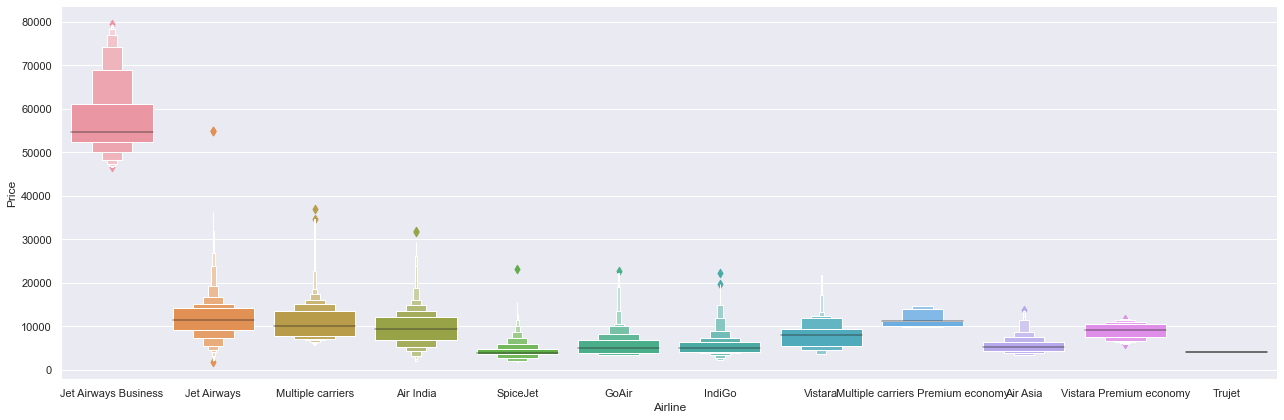

In [25]:
##Fromthe graph we can see that JetAirways Business prices are very high which may act as an Outlier
##Apart from this Airline almost all have similar median

#Airline vs Price
sns.catplot(y='Price',x='Airline',data=train_df.sort_values(["Price"],ascending=False),kind="boxen",aspect=3,height=6)

In [26]:
#As Airline column is Nominal Categorical data we will use One Hot Encoding

##(Target Mean Encoding is not used because the Cardinality is very less of very less Airlines therefore we go One hot encoding)
Airline=train_df[["Airline"]]
Airline=pd.get_dummies(Airline, drop_first=True)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [27]:
train_df['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

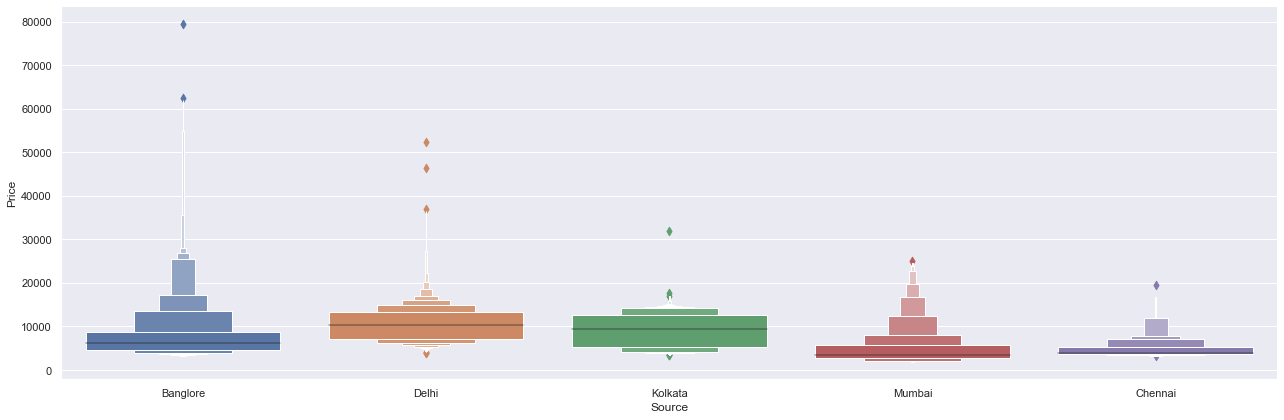

In [28]:
#Source vs Price

sns.catplot(y='Price',x="Source",data=train_df.sort_values(['Price'],ascending=False),kind="boxen",aspect=3,height=6)

Some Outlier are present in Bangalore and Delhi

In [29]:
##As Source is Also Nominal Category therefore One Hot Encoding

Source=train_df[["Source"]]
Source=pd.get_dummies(Source, drop_first=True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [30]:
train_df.Destination.value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [31]:
# As destiantion is Nominal Category data we willperform One hot Encoding
Destination=train_df[['Destination']]
Destination=pd.get_dummies(Destination, drop_first=True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [32]:
train_df['Additional_Info'].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
2 Long layover                     1
1 Short layover                    1
Red-eye flight                     1
Name: Additional_Info, dtype: int64

In [33]:
#Additional info contains 80% of no_info
#Route and Total Stops are related to each other
train_df.drop(['Route','Additional_Info'],axis=1, inplace=True)

In [34]:
train_df.head()

,Airline,Source,Destination,Total_Stops,Price,Jorney_Day,Journey_month,Dep_hour,Dep_min,Arr_hour,Arr_min,duration_hour,duration_minute
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,16,50,21,35,4,45


In [35]:
train_df.Total_Stops.value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

From the data we can observe that as the number of stops are increasing the pricesare increasing

In [36]:
#As this is the case for ordinal category data we will perform Label ENCODING
#Here values are assigned with corresponding keys
train_df["Total_Stops"].replace({"non-stop":0, "1 stop":1, "2 stops":2, "3 stops":3, "4 stops":4},inplace=True)

In [37]:
train_df.head()

,Airline,Source,Destination,Total_Stops,Price,Jorney_Day,Journey_month,Dep_hour,Dep_min,Arr_hour,Arr_min,duration_hour,duration_minute
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


In [38]:
%whos

Variable          Type         Data/Info
----------------------------------------
Airline           DataFrame           Airline_Air India <...>[10682 rows x 11 columns]
Destination       DataFrame           Destination_Cochin<...>n[10682 rows x 5 columns]
Source            DataFrame           Source_Chennai  So<...>n[10682 rows x 4 columns]
duration          list         n=10682
duration_hour     list         n=10682
duration_minute   list         n=10682
i                 int          10681
np                module       <module 'numpy' from 'C:\<...>ges\\numpy\\__init__.py'>
pd                module       <module 'pandas' from 'C:<...>es\\pandas\\__init__.py'>
plt               module       <module 'matplotlib.pyplo<...>\\matplotlib\\pyplot.py'>
sns               module       <module 'seaborn' from 'C<...>s\\seaborn\\__init__.py'>
train_df          DataFrame               Airline    Sou<...>[10682 rows x 13 columns]


In [39]:
##Concatinate 
train_df1=pd.concat([train_df, Airline,Destination,Source], axis=1)

In [40]:
train_df1.drop(["Airline", "Source", "Destination"], axis=1, inplace=True)

In [41]:
train_df1.head()

,Total_Stops,Price,Jorney_Day,Journey_month,Dep_hour,Dep_min,Arr_hour,Arr_min,duration_hour,duration_minute,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [42]:
train_df1.shape

(10682, 30)

## Test Data

In [105]:
test_df=pd.read_excel("Test_set.xlsx")

In [112]:
test_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Journey_day,Journey_month
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,6
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,12,5
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,5
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,21,5
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,24,6


Price column- not present in test data set

In [107]:
print("Test data info\n ","----"*10)
print(test_df.info())

Test data info
  ----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB
None


In [108]:
test_df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [109]:
test_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [110]:
test_df['Journey_day']=pd.to_datetime(test_df['Date_of_Journey'], format="%d/%m/%Y").dt.day
test_df['Journey_month']=pd.to_datetime(test_df["Date_of_Journey"], format="%d/%m/%Y").dt.month

In [49]:
test_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Journey_day,Journey_month
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,6
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,12,5
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,5
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,21,5
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,24,6


In [50]:
test_df['Dep_hour']=pd.to_datetime(test_df["Dep_Time"]).dt.hour
test_df['Dep_Min']=pd.to_datetime(test_df["Dep_Time"]).dt.minute
test_df['Arr_Hour']=pd.to_datetime(test_df["Arrival_Time"]).dt.hour
test_df["Arr_Min"]=pd.to_datetime(test_df["Arrival_Time"]).dt.minute

In [51]:
test_df.drop(["Date_of_Journey","Arrival_Time", "Dep_Time"], axis=1, inplace=True)
test_df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_day,Journey_month,Dep_hour,Dep_Min,Arr_Hour,Arr_Min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,10h 55m,1 stop,No info,6,6,17,30,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,4h,1 stop,No info,12,5,6,20,10,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,23h 45m,1 stop,In-flight meal not included,21,5,19,15,19,0
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,13h,1 stop,No info,21,5,8,0,21,0
4,Air Asia,Banglore,Delhi,BLR → DEL,2h 50m,non-stop,No info,24,6,23,55,2,45


In [52]:
Duration=list(test_df["Duration"])

for i in range(len(Duration)):
     if len(Duration[i].split()) !=2:
        if "h" in Duration[i]:
            Duration[i]=Duration[i].strip() + " 0m"
        else:
            Duration[i]="0h " + Duration[i].strip()
            
Duration_Hour=[]
Duration_minute=[]
for i in range(len(Duration)):
    Duration_Hour.append(int(Duration[i].split(sep="h")[0]))
    Duration_minute.append(int(Duration[i].split(sep="m")[0].split()[-1]))

In [53]:
test_df["Duration_Hour"]=Duration_Hour
test_df["Duration_minute"]=Duration_minute
test_df.drop(["Duration"], axis=1, inplace=True)

In [54]:
test_df.drop(["Route","Additional_Info"], axis=1, inplace=True)
test_df.head()

,Airline,Source,Destination,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_Min,Arr_Hour,Arr_Min,Duration_Hour,Duration_minute
0,Jet Airways,Delhi,Cochin,1 stop,6,6,17,30,4,25,10,55
1,IndiGo,Kolkata,Banglore,1 stop,12,5,6,20,10,20,4,0
2,Jet Airways,Delhi,Cochin,1 stop,21,5,19,15,19,0,23,45
3,Multiple carriers,Delhi,Cochin,1 stop,21,5,8,0,21,0,13,0
4,Air Asia,Banglore,Delhi,non-stop,24,6,23,55,2,45,2,50


In [55]:
Airline=test_df[["Airline"]]
Airline=pd.get_dummies(Airline, drop_first=True)
Source=test_df[["Source"]]
Source=pd.get_dummies(Source, drop_first=True)
Destination=test_df[["Destination"]]
Destination=pd.get_dummies("Destination", drop_first=True)
test_df.drop(["Airline","Source","Destination"], axis=1, inplace=True)
test_df["Total_Stops"].replace({"non-stop":0, "1 stop":1, "2 stops":2, "3 stops":3, "4 stops":4}, inplace=True)
test_df1=pd.concat([test_df, Airline, Source, Destination], axis=1)

In [ ]:
Y=test_df1[[""]]

In [56]:
test_df1.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_Min,Arr_Hour,Arr_Min,Duration_Hour,Duration_minute,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,1,6,6,17,30,4,25,10,55,0,0,0,1,0,0,0,0,0,0,0,1,0,0
1,1,12,5,6,20,10,20,4,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,1,21,5,19,15,19,0,23,45,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,1,21,5,8,0,21,0,13,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
4,0,24,6,23,55,2,45,2,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [57]:
train_df1.shape

(10682, 30)

In [58]:
train_df1.columns

Index(['Total_Stops', 'Price', 'Jorney_Day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arr_hour', 'Arr_min', 'duration_hour', 'duration_minute',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi', 'Source_Chennai',
       'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai'],
      dtype='object')

In [59]:
#Extracting independent feature
X=train_df1.loc[:,['Total_Stops', 'Jorney_Day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arr_hour', 'Arr_min', 'duration_hour', 'duration_minute',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi', 'Source_Chennai',
       'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai']]
X.head()

,Total_Stops,Jorney_Day,Journey_month,Dep_hour,Dep_min,Arr_hour,Arr_min,duration_hour,duration_minute,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,2,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,2,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
3,1,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,1,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [60]:
#Extracting label column
Y=train_df1.iloc[:,1:2]
Y.head()

,Price
0,3897
1,7662
2,13882
3,6218
4,13302


In [61]:
#Correlation between independent and dependent feature

train_df1.corr(method="spearman")

,Total_Stops,Price,Jorney_Day,Journey_month,Dep_hour,Dep_min,Arr_hour,Arr_min,duration_hour,duration_minute,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
Total_Stops,1.000000,0.715551,-0.010044,0.061653,-0.061336,-0.014580,0.042944,-0.111904,0.827771,-0.146833,0.240632,-0.058536,-0.308095,0.233334,0.018324,0.142762,0.012060,-0.286418,0.003343,-0.120524,-0.021632,0.508530,-0.473031,-0.278088,-0.248212,-0.012896,-0.248212,0.508530,0.044733,-0.278088
Price,0.715551,1.000000,-0.121830,-0.039704,0.007598,-0.061752,0.040149,-0.103535,0.691106,-0.142195,0.075603,-0.109626,-0.403857,0.460258,0.041027,0.174259,0.023514,-0.357037,-0.012757,-0.053475,0.001186,0.346112,-0.356815,-0.277375,-0.221518,0.127499,-0.221518,0.346112,0.040188,-0.277375
Jorney_Day,-0.010044,-0.121830,1.000000,-0.044424,0.001644,-0.006426,-0.002897,-0.017244,-0.022561,-0.008494,-0.032124,-0.003525,0.007019,-0.016450,-0.033277,0.041828,0.029632,0.021318,-0.008753,-0.013275,-0.020803,0.099347,0.002612,-0.014878,0.006172,-0.075623,0.006172,0.099347,-0.058828,-0.014878
Journey_month,0.061653,-0.039704,-0.044424,1.000000,0.035691,-0.051707,0.000447,-0.094331,0.038964,-0.042682,-0.045940,-0.005418,-0.046434,0.056798,-0.031969,0.062733,-0.047072,-0.015590,-0.013048,-0.021560,-0.019002,0.161793,0.070964,-0.034049,0.008703,-0.416930,0.008703,0.161793,0.048613,-0.034049
Dep_hour,-0.061336,0.007598,0.001644,0.035691,1.000000,-0.033015,0.054986,0.063949,-0.009968,-0.019563,-0.011399,-0.016203,-0.024899,0.111599,-0.009334,-0.137231,-0.031131,-0.014565,0.001325,0.020052,-0.003037,-0.116935,0.010551,-0.016269,-0.012641,-0.022767,-0.012641,-0.116935,0.151533,-0.016269
Dep_min,-0.014580,-0.061752,-0.006426,-0.051707,-0.033015,1.000000,0.045694,-0.018218,-0.036849,0.100686,-0.051282,0.074564,-0.001131,0.024993,0.009326,-0.118189,-0.006363,0.094637,-0.009133,-0.080663,-0.011234,-0.090524,0.003711,0.042805,0.072269,0.101596,0.072269,-0.090524,-0.020524,0.042805
Arr_hour,0.042944,0.040149,-0.002897,0.000447,0.054986,0.045694,1.000000,-0.172364,0.056828,-0.118522,0.077502,0.019077,-0.054347,-0.048867,-0.015152,0.088299,0.012179,-0.089971,0.001929,0.066057,-0.001686,-0.003755,-0.025932,-0.034775,-0.019950,-0.001109,-0.019950,-0.003755,0.051512,-0.034775
Arr_min,-0.111904,-0.103535,-0.017244,-0.094331,0.063949,-0.018218,-0.172364,1.000000,-0.110297,0.150136,0.048834,0.101431,0.030072,-0.049652,0.006000,-0.165089,-0.001457,0.019871,-0.002901,0.068773,0.000691,-0.201139,0.087406,0.080971,-0.029374,0.018523,-0.029374,-0.201139,0.115948,0.080971
duration_hour,0.827771,0.691106,-0.022561,0.038964,-0.009968,-0.036849,0.056828,-0.110297,1.000000,-0.168833,0.213128,-0.090689,-0.363558,0.327815,-0.007095,0.084685,0.006578,-0.311801,-0.006525,-0.033021,-0.019241,0.392793,-0.382323,-0.364117,-0.220778,0.008495,-0.220778,0.392793,0.130497,-0.364117
duration_minute,-0.146833,-0.142195,-0.008494,-0.042682,-0.019563,0.100686,-0.118522,0.150136,-0.168833,1.000000,-0.038945,0.068626,0.121293,-0.080200,-0.002071,-0.114864,-0.006181,0.034310,-0.008538,0.041463,0.004900,-0.151783,0.229065,-0.027076,-0.114276,0.080703,-0.114276,-0.151783,0.013800,-0.027076


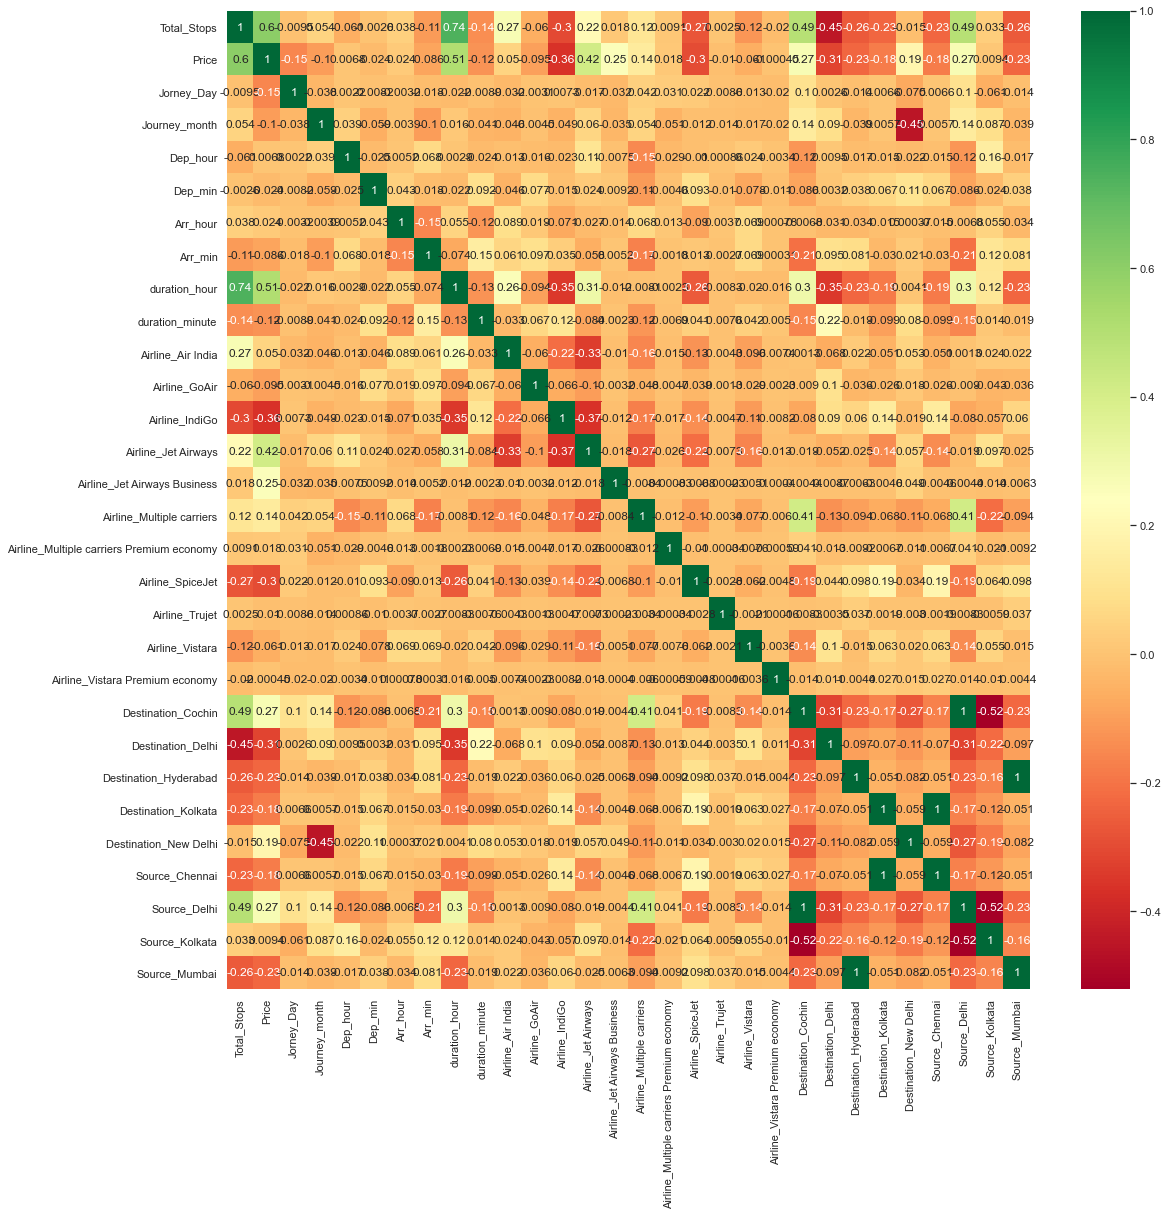

In [62]:
#Heat map

plt.figure(figsize=(18,18))

sns.heatmap(train_df1.corr(), annot=True, cmap="RdYlGn")

plt.show()

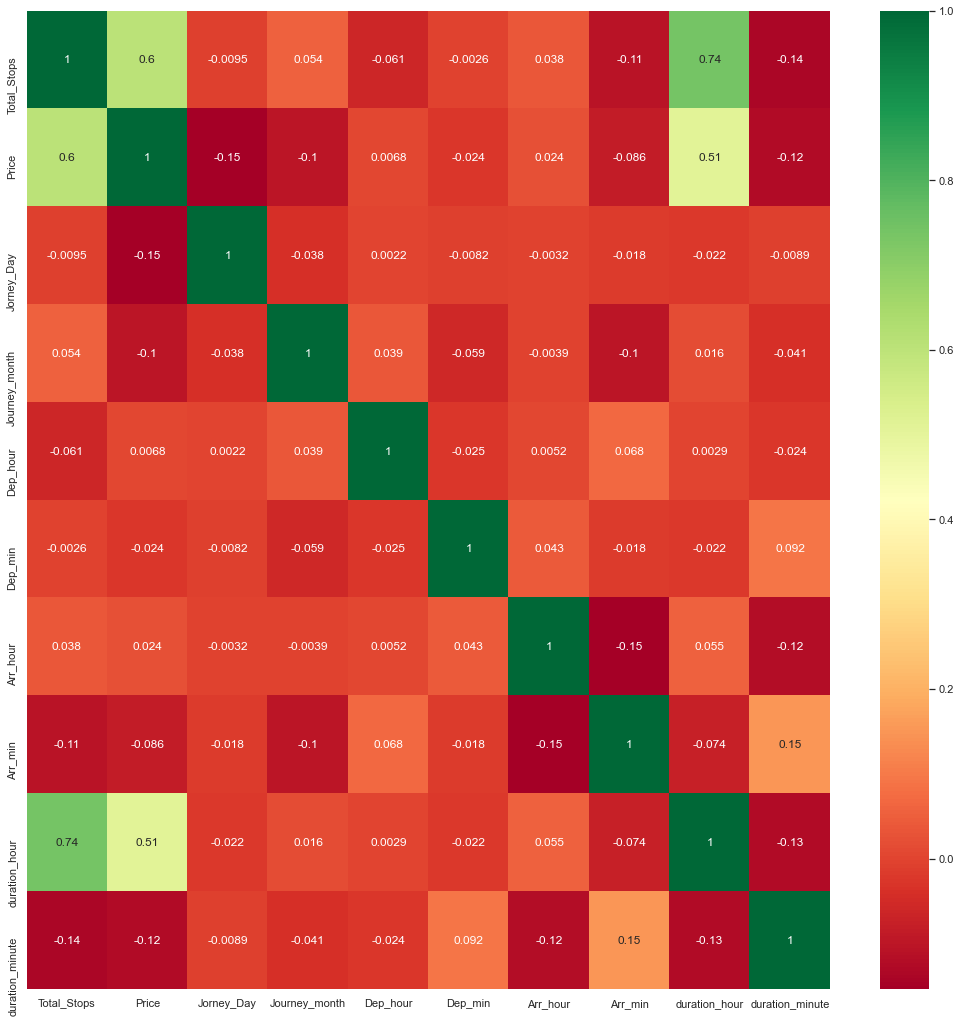

In [63]:
plt.figure(figsize = (18,18))
sns.heatmap(train_df.corr(), annot = True, cmap = "RdYlGn")

plt.show()

In [64]:
#Finding important feature using Extra tree Regressor
##Just to check

from sklearn.ensemble import ExtraTreesRegressor
f_selection=ExtraTreesRegressor()

In [65]:
f_selection.fit(X,Y)

<ipython-input-65-cc35c0e7ec54>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  f_selection.fit(X,Y)


ExtraTreesRegressor()

In [66]:
print(f_selection.feature_importances_)   ##type---nd.array

[2.03873643e-01 1.43713958e-01 5.32793428e-02 2.34111250e-02
 2.11164478e-02 2.94229213e-02 1.90845050e-02 1.41436901e-01
 1.82297207e-02 1.04297321e-02 1.94844988e-03 1.88713497e-02
 1.36382093e-01 6.71874382e-02 1.90732003e-02 8.46684512e-04
 3.16388719e-03 7.86539538e-05 4.91790394e-03 7.96699359e-05
 1.15084494e-02 1.88753417e-02 6.72581559e-03 4.14013718e-04
 2.49290535e-02 6.51549346e-04 1.09297666e-02 3.29540679e-03
 6.12297657e-03]


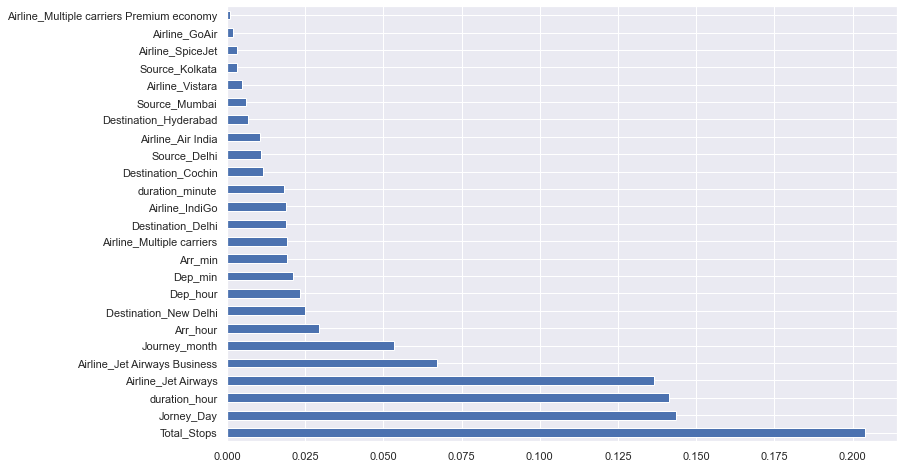

In [67]:
plt.figure(figsize=(12,8))

feat_importances=pd.Series(f_selection.feature_importances_, index=X.columns)
feat_importances.nlargest(25).plot(kind="barh")
plt.show()

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(X, Y ,test_size=0.2, random_state=333)


In [69]:
from sklearn.ensemble import RandomForestRegressor
reg_f=RandomForestRegressor()
reg_f.fit(X_train, Y_train)

<ipython-input-69-0fd380e87a97>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  reg_f.fit(X_train, Y_train)


RandomForestRegressor()

In [70]:
y_pred=reg_f.predict(X_test)
y_pred

array([ 7876.57      , 10913.476     , 12407.22133333, ...,
       11926.225     , 15255.26916667,  3939.162     ])

In [71]:
reg_f.score(X_train, Y_train)

0.9545458030814024

In [72]:
reg_f.score(X_test, Y_test)

0.8258928417048732

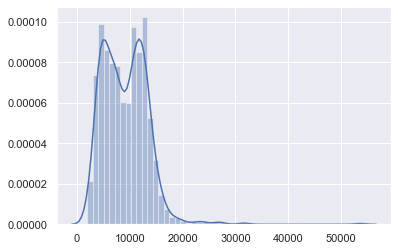

In [73]:
#sns.distplot(Y_test,y_pred)
sns.distplot(y_pred)
plt.show()

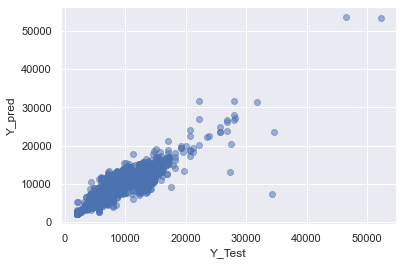

In [74]:
plt.scatter(Y_test, y_pred, alpha=.5)
plt.xlabel("Y_Test")
plt.ylabel("Y_pred")
plt.show()

In [75]:
from sklearn import metrics

In [76]:
print("MAE:" ,metrics.mean_absolute_error(Y_test,y_pred))
print("MSE:",metrics.mean_squared_error(Y_test,y_pred))
print("RMSE:", np.sqrt(metrics.mean_squared_error(Y_test,y_pred)))

MAE: 1165.086602878209
MSE: 3536639.8396742246
RMSE: 1880.5956076930054


In [77]:
metrics.r2_score(Y_test,y_pred)

0.8258928417048732

## Hyperparameter tuning

In [78]:
from sklearn.model_selection import RandomizedSearchCV

In [88]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
#min_samples_leaf = [1, 2, 5, 10]
#scoring='neg_mean_squared_error', n_iter = 10,

In [89]:

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split}

In [90]:
rf_random = RandomizedSearchCV(estimator = reg_f, param_distributions = random_grid, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [91]:
rf_random.fit(X_train,Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=sqrt, min_samples_split=15, n_estimators=500; total time=   4.1s


C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=sqrt, min_samples_split=15, n_estimators=500; total time=   4.8s


C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=sqrt, min_samples_split=15, n_estimators=500; total time=   4.1s


C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=sqrt, min_samples_split=15, n_estimators=500; total time=   4.1s


C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=sqrt, min_samples_split=15, n_estimators=500; total time=   3.6s


C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=auto, min_samples_split=100, n_estimators=300; total time=   5.1s


C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=auto, min_samples_split=100, n_estimators=300; total time=   5.7s


C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=auto, min_samples_split=100, n_estimators=300; total time=   5.8s


C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=auto, min_samples_split=100, n_estimators=300; total time=   5.9s


C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=auto, min_samples_split=100, n_estimators=300; total time=   5.1s


C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=5, max_features=auto, min_samples_split=100, n_estimators=700; total time=   8.1s


C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=5, max_features=auto, min_samples_split=100, n_estimators=700; total time=   7.8s


C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=5, max_features=auto, min_samples_split=100, n_estimators=700; total time=   7.8s


C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=5, max_features=auto, min_samples_split=100, n_estimators=700; total time=   8.0s


C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=5, max_features=auto, min_samples_split=100, n_estimators=700; total time=   7.8s


C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, max_features=sqrt, min_samples_split=5, n_estimators=700; total time=   4.5s


C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, max_features=sqrt, min_samples_split=5, n_estimators=700; total time=   4.5s


C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, max_features=sqrt, min_samples_split=5, n_estimators=700; total time=   4.5s


C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, max_features=sqrt, min_samples_split=5, n_estimators=700; total time=   4.5s


C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, max_features=sqrt, min_samples_split=5, n_estimators=700; total time=   4.5s


C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=20, max_features=sqrt, min_samples_split=10, n_estimators=1000; total time=   8.2s


C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=20, max_features=sqrt, min_samples_split=10, n_estimators=1000; total time=   8.1s


C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=20, max_features=sqrt, min_samples_split=10, n_estimators=1000; total time=   8.5s


C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=20, max_features=sqrt, min_samples_split=10, n_estimators=1000; total time=   8.2s


C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=20, max_features=sqrt, min_samples_split=10, n_estimators=1000; total time=   8.4s


C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=600; total time=   2.5s


C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=600; total time=   2.5s


C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=600; total time=   2.5s


C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=600; total time=   2.5s


C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=600; total time=   2.5s


C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=400; total time=   1.6s


C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=400; total time=   1.7s


C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=400; total time=   1.7s


C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=400; total time=   1.9s


C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=400; total time=   1.7s


C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, max_features=auto, min_samples_split=10, n_estimators=200; total time=   3.6s


C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, max_features=auto, min_samples_split=10, n_estimators=200; total time=   3.6s


C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, max_features=auto, min_samples_split=10, n_estimators=200; total time=   3.6s


C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, max_features=auto, min_samples_split=10, n_estimators=200; total time=   3.6s


C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, max_features=auto, min_samples_split=10, n_estimators=200; total time=   3.6s


C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=auto, min_samples_split=100, n_estimators=500; total time=   8.5s


C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=auto, min_samples_split=100, n_estimators=500; total time=   8.6s


C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=auto, min_samples_split=100, n_estimators=500; total time=   8.3s


C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=auto, min_samples_split=100, n_estimators=500; total time=   8.7s


C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=auto, min_samples_split=100, n_estimators=500; total time=   8.3s


C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=20, max_features=auto, min_samples_split=10, n_estimators=700; total time=  16.8s


C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=20, max_features=auto, min_samples_split=10, n_estimators=700; total time=  16.9s


C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=20, max_features=auto, min_samples_split=10, n_estimators=700; total time=  16.9s


C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=20, max_features=auto, min_samples_split=10, n_estimators=700; total time=  17.4s


C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=20, max_features=auto, min_samples_split=10, n_estimators=700; total time=  16.6s


C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:880: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, verbose=2)

In [92]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 10,
 'max_features': 'auto',
 'max_depth': 20}

In [93]:
pred2=rf_random.predict(X_test)

Plot a histogram of the residuals and make sure it looks normally distributed. Use either seaborn distplot, or just plt.hist().

In [94]:
#But First
print(Y_test.shape)

(2137, 1)


In [95]:
#We need to reshape pred2 the numpy.ndarray
pred2=pred2.reshape(2137,1)

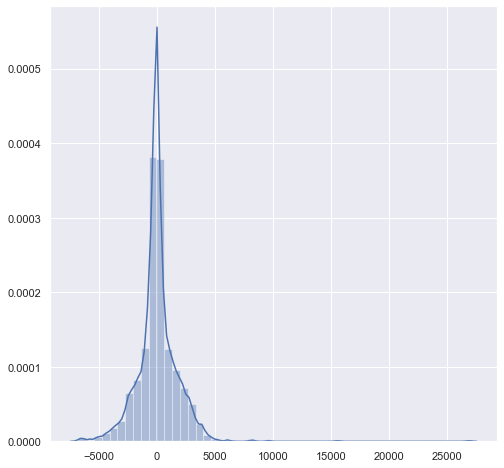

In [96]:
plt.figure(figsize=(8,8))
sns.distplot(Y_test-pred2)
#plt.hist(Y_test-pred2)
plt.show()

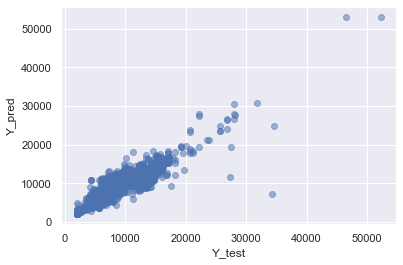

In [97]:
plt.scatter(x=Y_test, y=pred2, alpha=0.5)
plt.xlabel("Y_test")
plt.ylabel("Y_pred")
plt.show()

In [98]:
print('MAE:', metrics.mean_absolute_error(Y_test, pred2))
print('MSE:', metrics.mean_squared_error(Y_test, pred2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, pred2)))

MAE: 1116.149832960844
MSE: 3080913.198273476
RMSE: 1755.2530297006972


### Saving model

In [99]:
import pickle

file=open("flight_fare.pkl", "wb")

pickle.dump(reg_f, file)

In [100]:
file2=open("flight_fare_tuned.pkl", "wb")

pickle.dump(rf_random, file2)

In [101]:
model1=open("flight_fare.pkl","rb")
model2=open("flight_fare_tuned.pkl", "rb")

r_forest=pickle.load(model1)
r_forest_tuned=pickle.load(model2)

In [113]:
#Model testing
y_pred=r_forest_tuned.predict(X_test)

In [114]:
metrics.r2_score(Y_test, y_pred)

0.8483280553796068

In [115]:
X_train.head()

,Total_Stops,Jorney_Day,Journey_month,Dep_hour,Dep_min,Arr_hour,Arr_min,duration_hour,duration_minute,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
3565,1,27,6,7,5,12,35,5,30,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
7940,0,9,3,21,20,22,45,1,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
9493,0,24,3,13,20,15,35,2,15,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
4369,1,24,3,6,30,18,10,11,40,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
7265,0,21,3,22,10,0,55,2,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
